<a href="https://colab.research.google.com/github/aditya112346/Speech-Emotion-Recognition-/blob/main/Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#create a kaggle folder
!mkdir~/.kaggle/

/bin/bash: line 1: mkdir~/.kaggle/: No such file or directory


In [3]:
#install kaggle
!pip install -q kaggle

In [4]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 97% 415M/428M [00:03<00:00, 113MB/s]
100% 428M/428M [00:03<00:00, 137MB/s]


In [5]:
!unzip toronto-emotional-speech-set-tess.zip #used to extract the contents of a .zip file in environments like a terminal or Jupyter notebook.

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

IMPORT MODULES

In [6]:
import numpy as np #for numerical computing
import pandas as pd #library for data manipulation and analysis
import os #
import matplotlib.pyplot as plt #used for creating static, interactive, and animated visualizations
import seaborn as sns #for drawing attractive and informative statistical graphics.
import librosa #for analyzing and processing audio and music.
import librosa.display
from IPython.display import Audio
import warnings #Warnings are typically issued to indicate that something is not ideal, but the program can still run.
warnings.filterwarnings('ignore')
from keras import utils


LOAD THE DATASET

In [7]:
paths=[] #This empty list will hold the full file paths for each audio file
labels=[] #This empty list will hold the labels (emotions)

for dirname,_,filenames in os.walk('/content/tess toronto emotional speech set data'): # '_' - This would normally hold subdirectories in dirname,
  for filename in filenames:
    paths.append(os.path.join(dirname,filename))# append the directory path to path list
    label=filename.split('_')[-1]# -1 is to get the last part
    label=label.split('.')[0]
    labels.append(label.lower())
    if len(paths)==2800:
      break
print('Dataset is loaded')

Dataset is loaded


In [8]:
len(paths)

2800

In [9]:
labels[:5]

['sad', 'sad', 'sad', 'sad', 'sad']

In [10]:
#create a dataframe
df=pd.DataFrame()
df['speech']=paths #df['speech']: This creates a new column in the DataFrame called 'speech'
df['label']=labels
df.head() #This command displays the first five rows of the DataFrame by default.

,speech,label
0,/content/tess toronto emotional speech set dat...,sad
1,/content/tess toronto emotional speech set dat...,sad
2,/content/tess toronto emotional speech set dat...,sad
3,/content/tess toronto emotional speech set dat...,sad
4,/content/tess toronto emotional speech set dat...,sad


In [11]:
df['label'].value_counts() #The code df['label'].value_counts() is used to count the number of occurrences of each unique value in the 'label' column of the DataFrame df

,count
label,
sad,400
angry,400
happy,400
neutral,400
fear,400
ps,400
disgust,400


In [12]:
df['label_count']=df['label'].value_counts()

In [13]:
df.drop('label_count',axis=1) #The drop() function in Pandas is used to remove specified labels from rows or columns.

,speech,label
0,/content/tess toronto emotional speech set dat...,sad
1,/content/tess toronto emotional speech set dat...,sad
2,/content/tess toronto emotional speech set dat...,sad
3,/content/tess toronto emotional speech set dat...,sad
4,/content/tess toronto emotional speech set dat...,sad
...,...,...
2795,/content/tess toronto emotional speech set dat...,disgust
2796,/content/tess toronto emotional speech set dat...,disgust
2797,/content/tess toronto emotional speech set dat...,disgust
2798,/content/tess toronto emotional speech set dat...,disgust


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


EXPLORATORY DATA ANALYSIS

<Axes: xlabel='label', ylabel='count'>

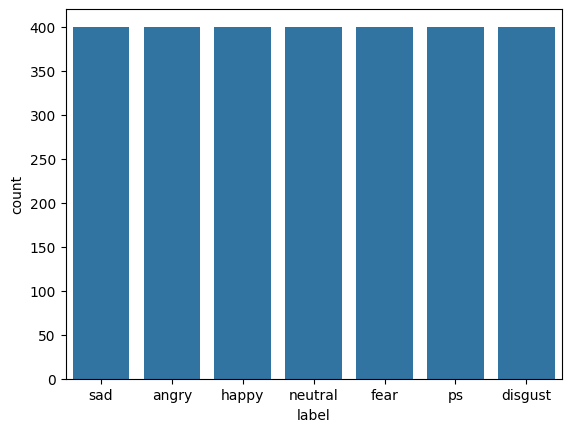

In [15]:
sns.countplot(data=df,x='label') #bar chart=count plot #This function from the Seaborn library creates a count plot

In [16]:
df

,speech,label,label_count
0,/content/tess toronto emotional speech set dat...,sad,NaN
1,/content/tess toronto emotional speech set dat...,sad,NaN
2,/content/tess toronto emotional speech set dat...,sad,NaN
3,/content/tess toronto emotional speech set dat...,sad,NaN
4,/content/tess toronto emotional speech set dat...,sad,NaN
...,...,...,...
2795,/content/tess toronto emotional speech set dat...,disgust,NaN
2796,/content/tess toronto emotional speech set dat...,disgust,NaN
2797,/content/tess toronto emotional speech set dat...,disgust,NaN
2798,/content/tess toronto emotional speech set dat...,disgust,NaN


In [17]:
def waveplot(data, sr, emotion):   #SR=SAMPLE RATE
    plt.figure(figsize=(10,4)) #This sets the size of the plot to be 10 inches wide and 4 inches tall.
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr) #This function from librosa displays the waveform of the audio signal.
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data) #The Short-Time Fourier Transform (STFT) is computed, which converts the time-domain signal into a frequency-domain signal.
    xdb = librosa.amplitude_to_db(abs(x)) #converting into decibles
    plt.figure(figsize=(11,4)) #Sets the size of the spectrogram plot.
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()


In [18]:
df['speech'].unique #This method returns an array of the unique values present in the 'speech' column.

<bound method Series.unique of 0       /content/tess toronto emotional speech set dat...
1       /content/tess toronto emotional speech set dat...
2       /content/tess toronto emotional speech set dat...
3       /content/tess toronto emotional speech set dat...
4       /content/tess toronto emotional speech set dat...
                              ...                        
2795    /content/tess toronto emotional speech set dat...
2796    /content/tess toronto emotional speech set dat...
2797    /content/tess toronto emotional speech set dat...
2798    /content/tess toronto emotional speech set dat...
2799    /content/tess toronto emotional speech set dat...
Name: speech, Length: 2800, dtype: object>

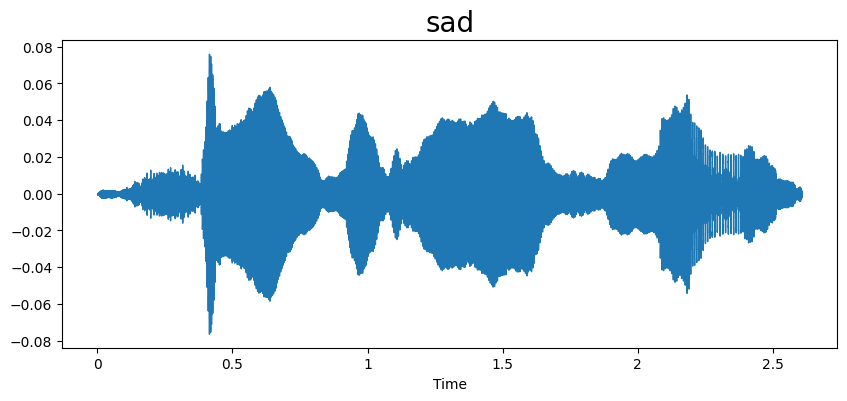

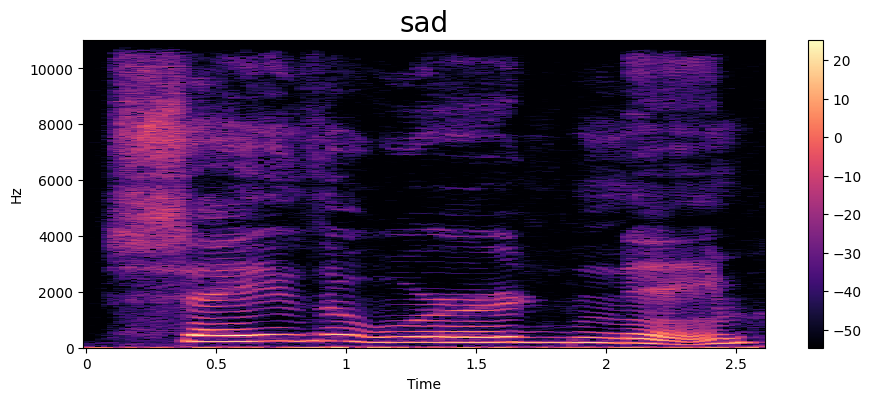

In [19]:
emotion='sad'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path) #This line loads the audio file located at the specified path.
#data: A NumPy array containing the audio time series (the actual audio data).
#sampling_rate: The sample rate of the audio file, which is the number of samples per second.
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion) #The spectrogram visualizes the frequency content of the audio signal over time, showing how different frequencies are present in the audio and how they change.
Audio(path)

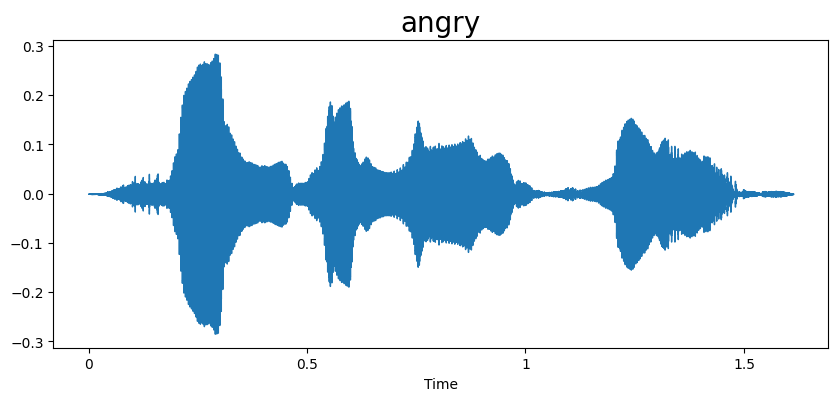

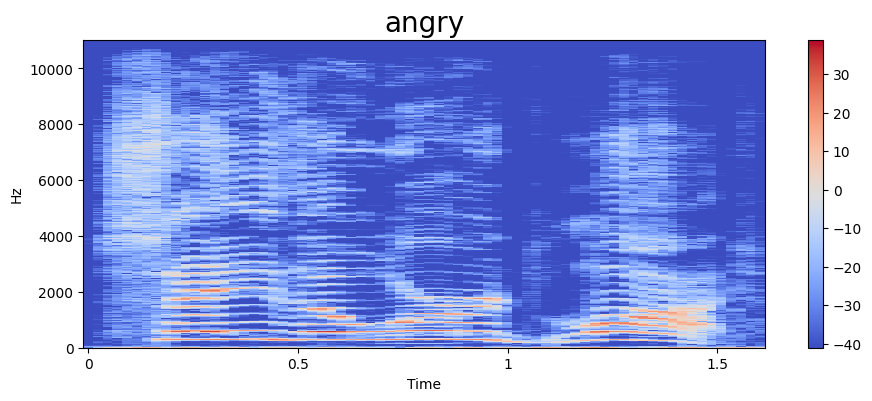

In [20]:
emotion='angry'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

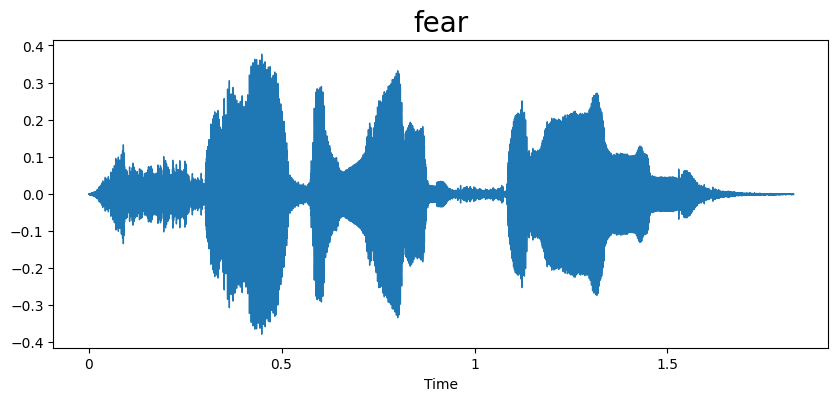

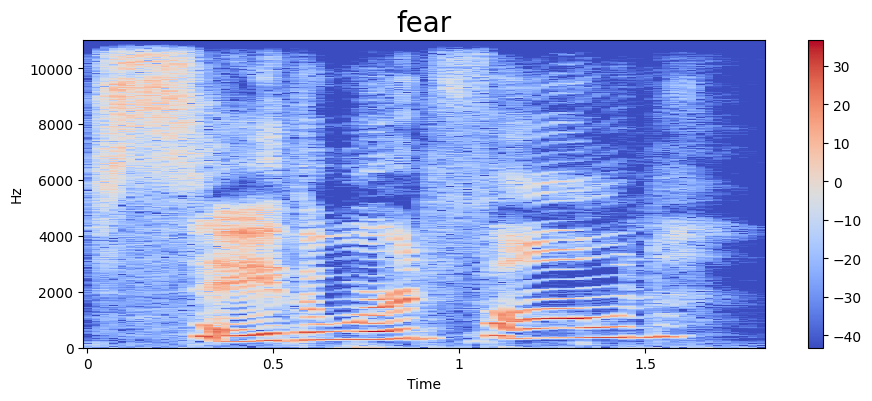

In [21]:
emotion='fear'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

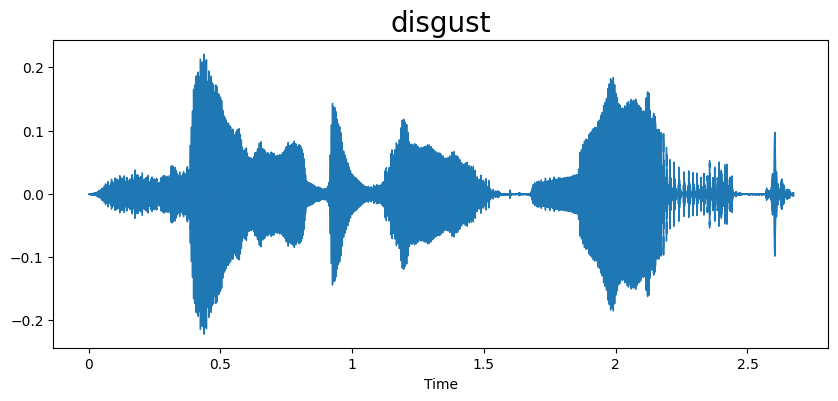

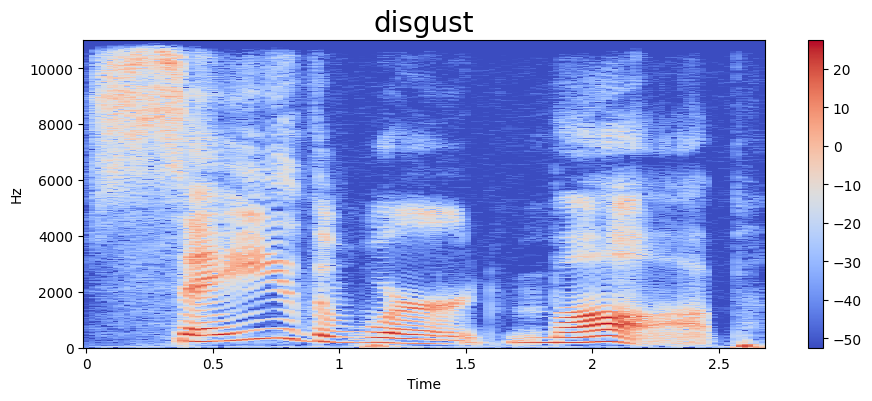

In [22]:
emotion='disgust'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

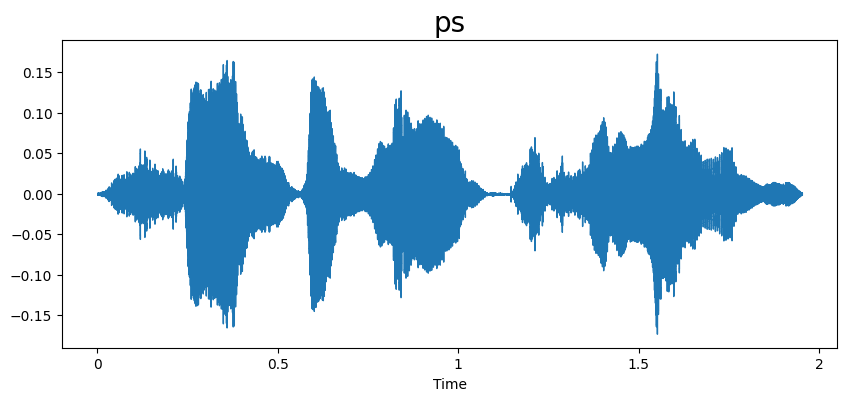

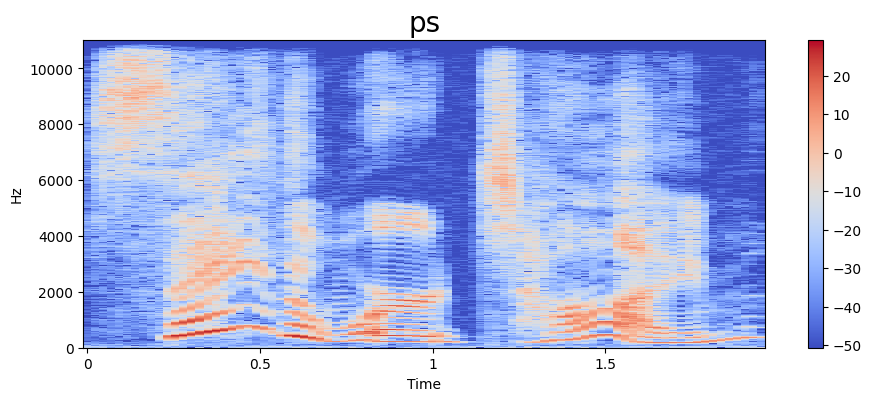

In [23]:
emotion='ps'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

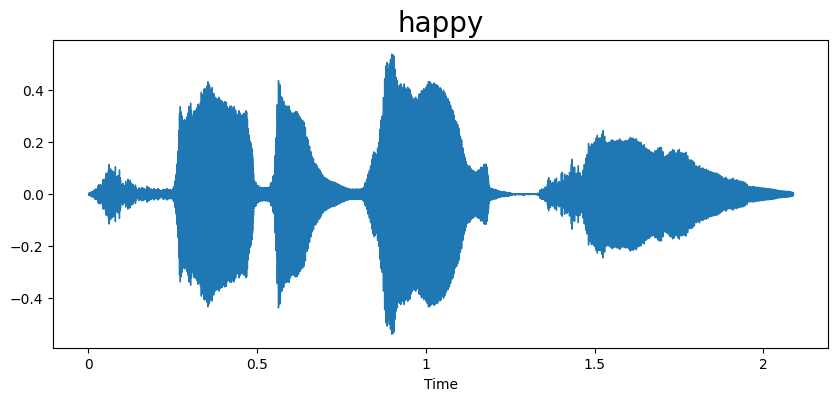

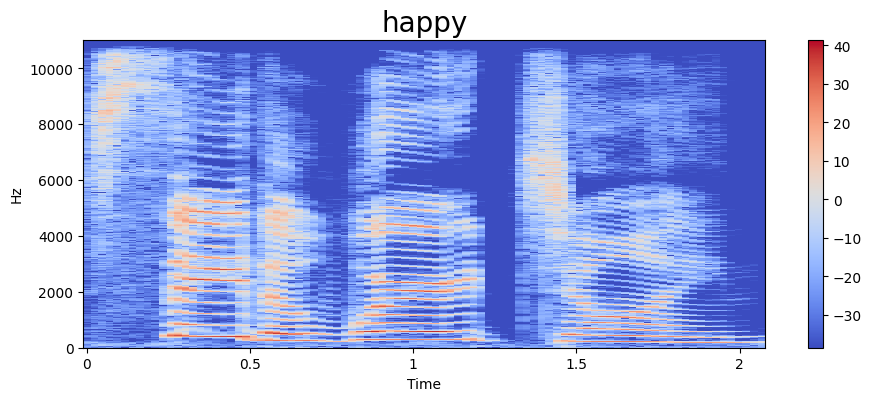

In [24]:
emotion='happy'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

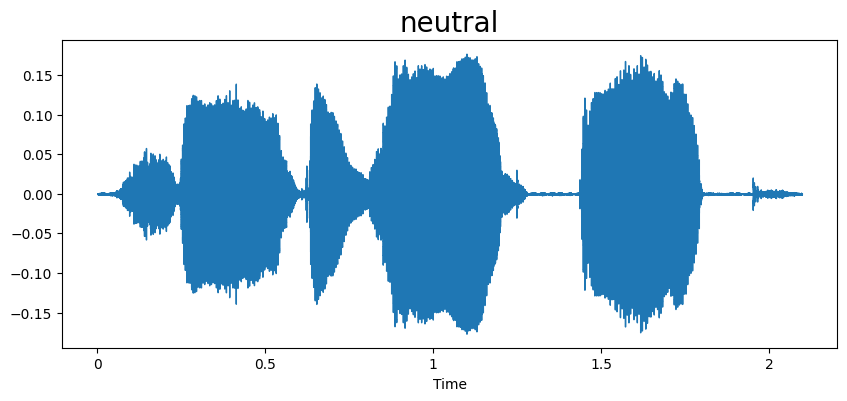

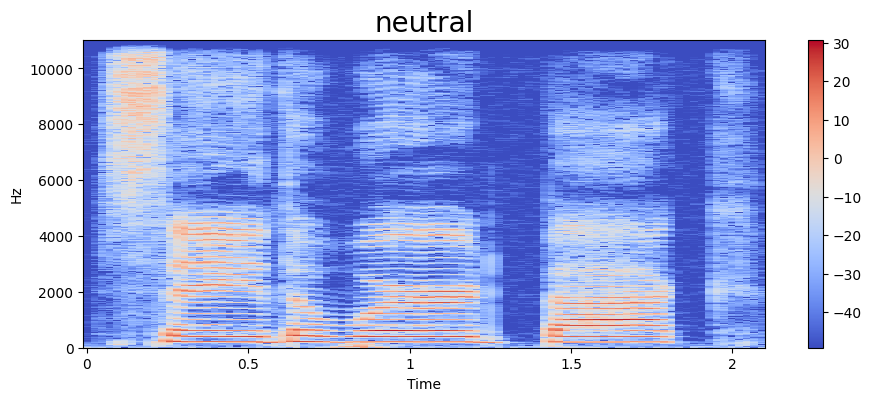

In [25]:
emotion='neutral'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

FEATURE EXTRACTION

In [26]:
def extract_mfcc(filename): #The extract_mfcc function is designed to extract the Mel-Frequency Cepstral Coefficients (MFCCs) from an audio file. (MFCC) is a popular method for extracting audio features
  y,sr=librosa.load(filename,duration=3,offset=0.5)#librosa.load is used to load audio file , offset is first 0.5 sec should be skipped
  mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0) #y: The audio time series data as a NumPy array.
  return mfcc #

In [27]:
extract_mfcc(df['speech'][0])

array([-5.28461121e+02,  1.05532524e+02,  3.36951256e+01,  1.92747517e+01,
        2.64250469e+01,  6.69489050e+00, -7.71053171e+00, -7.96135378e+00,
       -1.92235146e+01, -1.46670318e+00, -1.49978819e+01, -6.07192707e+00,
       -8.80677700e+00,  1.85927585e-01,  2.99492812e+00, -1.16085374e+00,
        2.00999284e+00,  3.71909976e+00,  1.77838790e+00, -9.77266026e+00,
        3.93785286e+00, -7.94986010e+00, -5.16587114e+00, -6.02338731e-01,
       -1.09397478e+01,  3.42276263e+00, -1.50507879e+00,  5.47776318e+00,
        1.80570650e+00,  8.28636551e+00,  4.96863747e+00,  8.17939377e+00,
        6.43163264e-01,  1.13969660e+01,  1.51086721e+01,  1.64546185e+01,
        2.06323547e+01,  1.67987442e+01,  4.09857035e+00,  9.22925091e+00],
      dtype=float32)

In [28]:
x_mfcc=df['speech'].apply(lambda x:extract_mfcc(x)) #lambda functions takes one argument x n passes to x_mfcc

In [29]:
x_mfcc

,speech
0,"[-528.4611, 105.532524, 33.695126, 19.274752, ..."
1,"[-510.73102, 95.49697, 21.746002, 5.636676, 21..."
2,"[-526.0847, 112.26481, 32.037457, 6.9437075, 1..."
3,"[-563.7178, 113.821266, 40.814095, 22.508987, ..."
4,"[-540.79266, 98.070404, 38.587116, 11.319377, ..."
...,...
2795,"[-471.9949, 102.390114, 14.029285, 7.79433, 18..."
2796,"[-463.48773, 99.21175, 25.25579, 5.409088, 17...."
2797,"[-452.73755, 127.53739, 34.25469, -3.499513, -..."
2798,"[-499.05136, 121.57547, 29.501469, -14.094628,..."


In [30]:
x=[x for x in x_mfcc] #converted normal dataframe into 2-D array
x=np.array(x)
x.shape

(2800, 40)

In [31]:
#input split
x=np.expand_dims(x,-1)
x.shape

(2800, 40, 1)

In [32]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder() #encoder represents in binary form
y=enc.fit_transform(df[['label']])#the double brackets [['label']], which is required to keep the column as a DataFrame (not as a Series)

In [33]:
if hasattr(y, 'toarray'):  # Check if y is a sparse matrix    #The hasattr function checks whether the object y has an attribute or method named 'toarray'.
    y = y.toarray()

In [34]:
y.shape

(2800, 7)

CREATE LSTM MODEL

In [35]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

def create_model():
    model=Sequential([
        LSTM(123,return_sequences=False,input_shape=(40,1)), #input_shape=(40, 1): Here, it assumes that the input data has 40 time steps (like 40 MFCC features) and 1 feature per time step.
        Dense(64,activation='relu'),
        Dropout(0.2),
        Dense(32,activation='relu'),
        Dropout(0.2), #Dropout layer that randomly sets 20% of the inputs to 0 during training to prevent overfitting.
        Dense(7,activation='softmax') #The output layer with 7 neurons (assuming 7 classes), using the softmax activation function, which is appropriate for multi-class classification
    ])
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.summary()
    return model # Make sure to return the model

model = create_model()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 123)                 │          61,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           7,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,747 (280.26 KB)

 Trainable params: 71,747 (280.26 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
#train the model
history=model.fit(x,y,validation_split=0.2,epochs=100,batch_size=512,shuffle=True)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 387ms/step - accuracy: 0.1900 - loss: 1.9986 - val_accuracy: 0.1214 - val_loss: 1.9627
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 290ms/step - accuracy: 0.3372 - loss: 1.8508 - val_accuracy: 0.2589 - val_loss: 2.0206
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 292ms/step - accuracy: 0.4636 - loss: 1.6832 - val_accuracy: 0.2500 - val_loss: 2.1987
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 325ms/step - accuracy: 0.4957 - loss: 1.4512 - val_accuracy: 0.2071 - val_loss: 2.3925
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 652ms/step - accuracy: 0.5417 - loss: 1.2123 - val_accuracy: 0.1107 - val_loss: 2.5418
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step - accuracy: 0.5773 - loss: 1.0016 - val_accuracy: 0.0893 - val_loss: 2.4867
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 274ms/step - accuracy: 0.7023 - loss: 0.8148 - val_accuracy: 0.0589 - val_loss: 2.9098
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 329ms/step - accuracy: 0.7394 - loss: 0.6849 - val_accuracy: 0.1464 - v

PLOT THE RESULTS


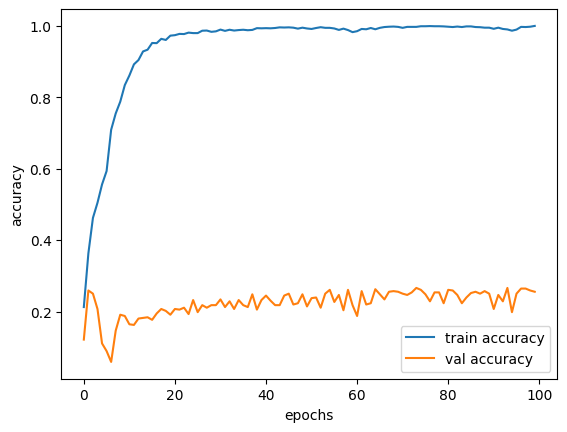

In [37]:
epochs=list(range(100))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epochs,acc,label='train accuracy')
plt.plot(epochs,val_acc,label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


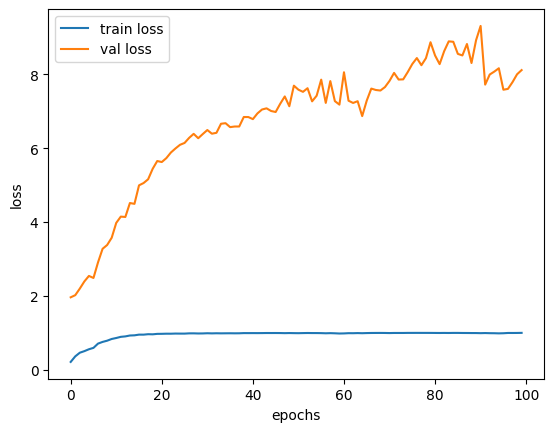

In [38]:
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.plot(epochs,acc,label='train loss')
plt.plot(epochs,val_loss,label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [39]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split

# Assuming 'x' and 'y' hold your entire dataset
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Now you can train your model using x_train and y_train
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=512, shuffle=True)

# And make predictions on the validation set
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)  # Fix the typo: '+' should be '='

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 298ms/step - accuracy: 0.8413 - loss: 1.4868 - val_accuracy: 0.8339 - val_loss: 0.5718
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 301ms/step - accuracy: 0.8209 - loss: 0.5809 - val_accuracy: 0.8643 - val_loss: 0.4145
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 476ms/step - accuracy: 0.8457 - loss: 0.4642 - val_accuracy: 0.9107 - val_loss: 0.3057
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 424ms/step - accuracy: 0.9031 - loss: 0.3199 - val_accuracy: 0.9393 - val_loss: 0.1771
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 264ms/step - accuracy: 0.9209 - loss: 0.2402 - val_accuracy: 0.9643 - val_loss: 0.1300
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 294ms/step - accuracy: 0.9481 - loss: 0.1855 - val_accuracy: 0.9750 - val_loss: 0.1171
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 262ms/step - accuracy: 0.9659 - loss: 0.1403 - val_accuracy: 0.9589 - val_loss: 0.0949
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 276ms/step - accuracy: 0.9616 - loss: 0.1321 - val_accuracy: 0.9786 - v

In [40]:
from sklearn.metrics import confusion_matrix,classification_report

In [41]:
#Compute confusion matrix
conf_matrix=confusion_matrix(y_val_classes,y_pred_classes)

#print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 79   1   0   0   0   2   0]
 [  0  72   0   0   0   0   1]
 [  0   0  84   0   0   0   0]
 [  0   0   0 101   0   0   0]
 [  0   0   0   0  67   0   0]
 [  0   1   0   0   0  78   0]
 [  0   0   0   0   0   0  74]]


In [42]:
#print the classification report
target_names=['angry','disgust','fear','happy','neutral','ps','sad']
print("Classification Report:")
print(classification_report(y_val_classes,y_pred_classes,target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

       angry       1.00      0.96      0.98        82
     disgust       0.97      0.99      0.98        73
        fear       1.00      1.00      1.00        84
       happy       1.00      1.00      1.00       101
     neutral       1.00      1.00      1.00        67
          ps       0.97      0.99      0.98        79
         sad       0.99      1.00      0.99        74

    accuracy                           0.99       560
   macro avg       0.99      0.99      0.99       560
weighted avg       0.99      0.99      0.99       560



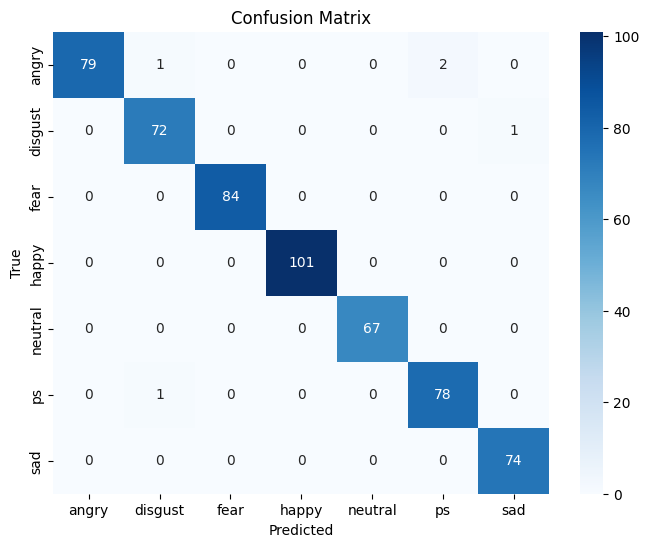

In [43]:
#correlation HeatMap
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=target_names,yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()